<a href="https://colab.research.google.com/github/jessetuglu/Glowscript-SolarSystemModel/blob/master/SARS_CoV_2_Research_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import dependencies
import json
#To work with json file format
import os
#Directory/filepath use
import pandas as pd
#dataframes
from tqdm import tqdm
#adding a loading bar(see below screenshots)
import re
#regular expressions library 
import matplotlib.pyplot as plt
#graphing results
import numpy as np
#calculations

In [0]:
#Unfortunately, the data was provided in a .json files so it was a little difficult to convert to manageable format. 
#I begin by creating an empty list to hold the data extracted from the files
docs = []

folder_path = "/Users/jessetuglu/Desktop/2020-03-13"
#making the list of subfolders to iterate through
directories = ["biorxiv_medrxiv","comm_use_subset","noncomm_use_subset"]
#Swtiching the current working directory to the folder pathname 
os.chdir("/Users/jessetuglu/Desktop/2020-03-13")

In [0]:
#Initial "for" loop to establish that same actions must be done to each folder. 
for a in directories:
    #second "for" loop to access the files inside of the folders referenced in the list "directories."As each main folder has a sub-folder of the same name, I had to {a} twice. 
    for b in tqdm(os.listdir(f"{a}/{a}")):
        #defining individual file paths
        file_path = f"{a}/{a}/{b}"
        #opening files
        jsons = json.load(open(file_path,"rb"))
        #finding essentially what the "headings" are in the files. In this case, "title" is one of the metadata(headers) of the data.
        title = jsons['metadata']['title']
        #searching for certain formatting in the form of "abstract" classes. 
        try:
            abst = jsons['abstract'][0]
        except:
            abst = ""
        #setting empty string to add later
        full_text = ""
        #referencing each "body_text" heading. 
        for text in jsons['body_text']:
            #adding the text to the previously defined string and then indenting for formatting.
            full_text += text['text'] + "\n\n"   
        #adding these strings to the list.
        docs.append([title,abst,full_text])
        #creating a pandas dataframe to house the data. "Title" being the title of the paper, "abstract" being the formatting and other information, and "text" being the "body_text" seen previously. 
df = pd.DataFrame(docs,columns=['title','abstract','text'])

In [0]:
#After finally importing the json file data and converting it into plain text(strings) in a dataframe, it is now very easy to analyze. 
#create a dataframe containing the strings which have the keyword "incubation."
incubation = df[df['text'].str.contains('incubation')]
#checking to make sure correct data has been placed into dataframe by displaying the first 5 samples
print(incubation.head())
#creating an array of such values.
incubation_texts = incubation['text'].values
#returns the number of strings with the keyword.
print(len(incubation_texts))
#creating a list to hold the incubation period data.
incubation_periods = []
#another "for" loop to iterate through the strings.
for t in incubation_texts:
    #by seperating the strings into individual sentences, it will be easier to analyze the incubation time.
    for sentence in t.split(". "):
        #checking to make sure only sentences with "incubation" in them are viewed. 
        if "incubation" in sentence:
            #identifying whether "day" is also in sentence
            single_day = re.findall(r" \d{1,2} day",sentence)
            #if there is one found..
            if len(single_day) == 1:
                #finding the number attached to the substring "day."
                num = single_day[0].split(" ")
                #placing that number in the list I referenced before. 
                incubation_periods.append(float(num[1]))
#how many data points
print("Total number of recorded times: " + str(len(incubation_periods)))
#this is a python array now so use numpy to calculate average incubation time
print("Average incubation time is: "+ np.mean(incubation_periods))
#graph
plt.hist(incubation_periods,bins= 40)
plt.xlabel("Incubation Period (days)")
plt.ylabel("Number of cases")
plt.show()

The folowing two boxes display a very broad search method through the nearly 11700 json files. Searching for keywords such as "transmission" or "vaccine" one is easily able to find related sentences and, hopefully, some useful information 

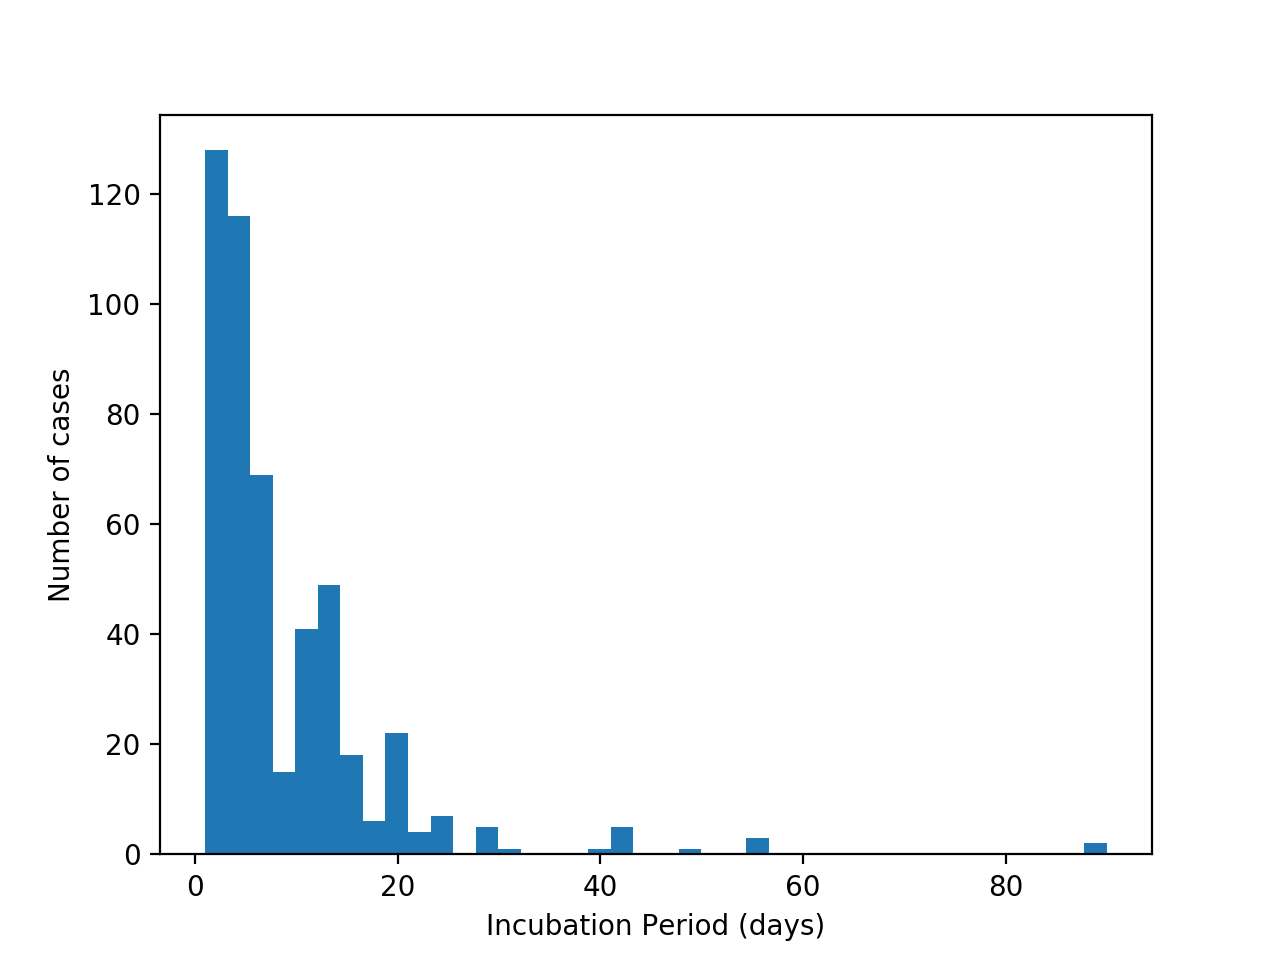

In [3]:
from IPython.display import Image
Image('Figure_1.png')

In [0]:
#TRANSMISSION
transmission = df[df['text'].str.contains('transmission')]
transmission_texts = transmission['text'].values
transmission_sentences = []
for t in transmission_texts:
    for sentence in t.split(". "):
        if ("transmission" and "SARS-CoV-2")in sentence:
            transmission_sentences.append(sentence)
#print(len(transmission_sentences))
transmission_sentences_df = pd.DataFrame(transmission_sentences,columns=["Sentences"])
#print(transmission_sentences_df.head())
transmission_sentences_df.to_csv('transmission_sentences.csv')

In [0]:
#VACCINES
vaccine = df[df['text'].str.contains('vaccine')]
vaccine_texts = vaccine['text'].values
vaccine_sentences = []
for t in vaccine_texts:
    for sentence in t.split(". "):
        if (" vaccine " and "SARS-CoV-2")in sentence:
            vaccine_sentences.append(sentence)
#print(len(vaccine_sentences))
vaccine_sentences_df = pd.DataFrame(vaccine_sentences,columns=["Sentences"])
#print(vaccine_sentences_df.head())
vaccine_sentences_df.to_csv('vaccine_sentences.csv')